# English dataset

In [3]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

## Connet to the drive

In [2]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/data/GP data/')

Mounted at /content/drive


In [3]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 9.7 MB/s 


## Imoport the required libraries

In [1]:
import pandas as pd
import sklearn
import numpy as np
import re
import nltk

import matplotlib.pyplot as plt
from matplotlib import style

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as esw
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
import string

from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier

from skopt import BayesSearchCV

from wordcloud import WordCloud,STOPWORDS
import numpy as np
import tensorflow as tf

import pickle
import re
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB


from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# allow display of multiple outputs by running one code cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



C:\Users\fatma\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\fatma\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\fatma\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
import xgboost as xgb

xgb.__version__

'1.5.2'

## Read the dataset

In [5]:
data = pd.read_csv('final_data_en.csv', index_col='id')
data.head()
data = data.drop(data.columns[0], axis=1)
data.head()

,Unnamed: 0,location,tweetcreatedts,text,class
id,,,,,
1039,9604,the nationwood street,2021-02-08 19:07:40+00:00,RT @maideeeni: I want to say a very big thank ...,anxiety
1682,1682,RH Waiting For Update Planet,2021-02-03 23:58:40+00:00,@AisYalcaE @clyrhck Done! I just need 320! Tha...,lonely
5275,5275,Any pronouns ¡ GMT+8,2021-01-27 23:57:59+00:00,@SAD_istfied I'm gonna cry /pos,stress
6069,6069,........,2021-02-03 23:58:23+00:00,RT @JoshOfficial___: I need a consistent fuck ...,anxiety
6087,6087,"St Louis, MO",2021-02-12 20:27:58+00:00,RT @mikegolicjr: glad we're finally talking ab...,normal


,location,tweetcreatedts,text,class
id,,,,
1039,the nationwood street,2021-02-08 19:07:40+00:00,RT @maideeeni: I want to say a very big thank ...,anxiety
1682,RH Waiting For Update Planet,2021-02-03 23:58:40+00:00,@AisYalcaE @clyrhck Done! I just need 320! Tha...,lonely
5275,Any pronouns ¡ GMT+8,2021-01-27 23:57:59+00:00,@SAD_istfied I'm gonna cry /pos,stress
6069,........,2021-02-03 23:58:23+00:00,RT @JoshOfficial___: I need a consistent fuck ...,anxiety
6087,"St Louis, MO",2021-02-12 20:27:58+00:00,RT @mikegolicjr: glad we're finally talking ab...,normal


## Check the data quality

In [6]:
#find duplicate rows across all columns
print('Number of the duplicated rows= ',data.duplicated().sum())

# summary of the number of nulls
print('Total missing values = ', data.isna().sum().sum())

print('Number of nulls in each column:')
data.isna().sum()
print('________________________________________________________________')

# count the ratio of missing values
total_miss = data.isnull().sum()
percent_miss = (total_miss/data.isnull().count()*100)

# sort attributes by missing value ratio
missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':percent_miss})
missing_data.sort_values(by='Total missing',ascending=False)

Number of the duplicated rows=  7763
Total missing values =  13084
Number of nulls in each column:


location          13084
tweetcreatedts        0
text                  0
class                 0
dtype: int64

________________________________________________________________


,Total missing,% missing
location,13084,32.90248
tweetcreatedts,0,0.00000
text,0,0.00000
class,0,0.00000


<Figure size 720x432 with 0 Axes>

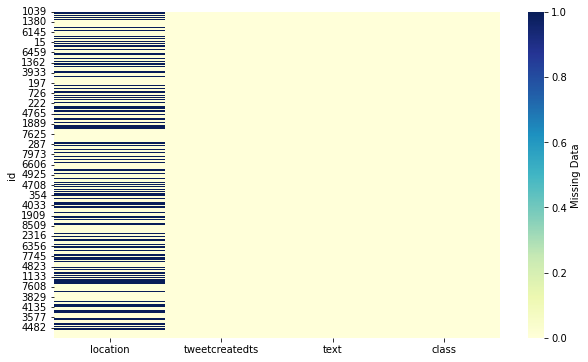

In [7]:
# visualize the heatmap of the missing values in the location column
plt.figure(figsize=(10,6))
sns.heatmap(data.isna(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

## Make data exploration

In [8]:
data['class'].value_counts()

anxiety    12585
normal     10022
stress      8599
lonely      8560
Name: class, dtype: int64

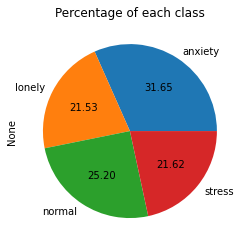

In [9]:
plot = data.groupby('class').size().plot.pie(autopct='%.2f', y='percentage', title='Percentage of each class')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Class Distribution Over Entries')

Text(0.5, 0, 'Class')

Text(0, 0.5, 'Frequency')

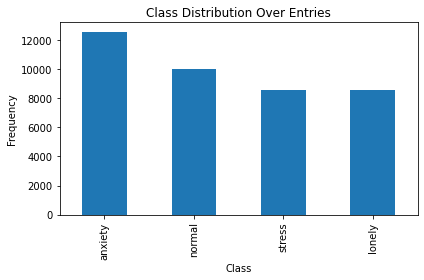

In [10]:
plt.figure()
ax = data['class'].value_counts().plot(kind='bar')

ax.set_title('Class Distribution Over Entries')
ax.set_xlabel('Class')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [11]:
# fill the null values in the location column with word 'other'
data['location']=data['location'].fillna('other')

In [12]:
data['location'].value_counts()


other                     13084
United States               330
she/her                     296
Los Angeles, CA             211
California, USA             191
                          ...  
Great Tomb of Nazarick        1
Northumberland, UK            1
6.2758° N, 7.0068° E          1
permanent vacation            1
Doylestown, PA                1
Name: location, Length: 11404, dtype: int64

<Figure size 1080x1080 with 0 Axes>

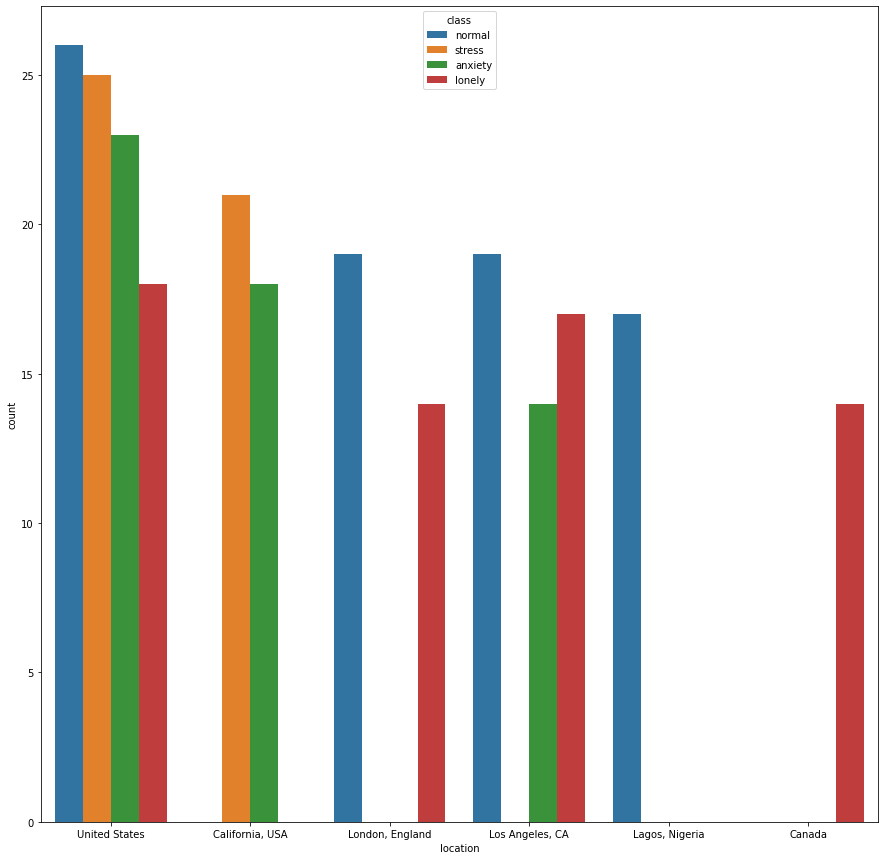

In [13]:
# top five country that have mental health problem
data.drop(data[(data['location'] =='other') | (data['location'] == 'she/her')].index, inplace=True)

count=data[['location','class']].groupby(['class'])
fre=count['location'].value_counts()
tt=fre.reset_index(name='count')
tt=tt.sort_values(by='count',ascending=False).head(13)
plt.figure(figsize=(15,15))
sns.barplot(x=tt['location'], y=tt['count'],hue=tt['class'])
plt.savefig("distribution of classes over the most top countries have mental health problems.png", dpi=100)


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Class Distribution Over United States')

Text(0.5, 0, 'Class')

Text(0, 0.5, 'Frequency')

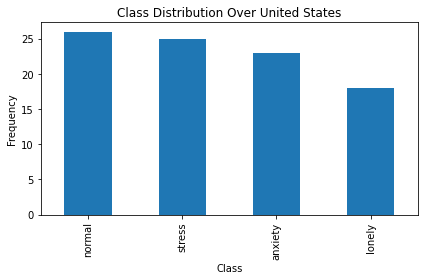

In [14]:
plt.figure()
ax =data[data['location']=='United States']['class'].value_counts().plot(kind='bar')
ax.set_title('Class Distribution Over United States')
ax.set_xlabel('Class')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [15]:
# convert the type of the tweetcreatedts column into datetime type

data['tweetcreatedts']=pd.to_datetime(data['tweetcreatedts'], format="%Y/%m/%d")
data['tweetcreatedts']


id
1682   2021-02-03 23:58:40+00:00
6144   2021-01-27 23:58:48+00:00
5406   2021-02-12 20:07:12+00:00
5227   2021-02-12 20:07:13+00:00
8157   2021-01-27 23:58:42+00:00
                  ...           
2593   2021-02-03 23:59:30+00:00
7361   2021-02-12 20:27:57+00:00
8444   2021-01-27 23:58:29+00:00
9173   2021-02-12 20:46:01+00:00
8855   2021-02-12 20:46:01+00:00
Name: tweetcreatedts, Length: 7360, dtype: datetime64[ns, UTC]

In [16]:
data['Year'] =data['tweetcreatedts'].dt.year
data['Month'] = data['tweetcreatedts'].dt.month
data['Day'] = data['tweetcreatedts'].dt.day

In [17]:
data['Week_Number'] = data['tweetcreatedts'].dt.isocalendar().week
data['day_name']=data['tweetcreatedts'].dt.day_name()
data

,location,tweetcreatedts,text,class,Year,Month,Day,Week_Number,day_name
id,,,,,,,,,
1682,RH Waiting For Update Planet,2021-02-03 23:58:40+00:00,@AisYalcaE @clyrhck Done! I just need 320! Tha...,lonely,2021,2,3,5,Wednesday
6144,"Eugene, OR",2021-01-27 23:58:48+00:00,RT @venusized: why do humans need jobs why can...,lonely,2021,1,27,4,Wednesday
5406,773 • 941,2021-02-12 20:07:12+00:00,"RT @yungchipotle: when someone ghosts you, res...",normal,2021,2,12,6,Friday
5227,"#Fort Walton Beach, Florida",2021-02-12 20:07:13+00:00,RT @RDTVF: MARTIN LIVE ON AIR #RADIO Tony Ryb...,normal,2021,2,12,6,Friday
8157,she/her/elle,2021-01-27 23:58:42+00:00,RT @venusized: why do humans need jobs why can...,anxiety,2021,1,27,4,Wednesday
...,...,...,...,...,...,...,...,...,...
2593,"Bhavnagar, India",2021-02-03 23:59:30+00:00,RT @ImRo45: India has always been stronger whe...,lonely,2021,2,3,5,Wednesday
7361,"Chicago, IL",2021-02-12 20:27:57+00:00,Does all baby swiss grow up to be regular swis...,normal,2021,2,12,6,Friday
8444,🇲🇽,2021-01-27 23:58:29+00:00,@eunsooful yes but i also need to pay attentio...,anxiety,2021,1,27,4,Wednesday


<Figure size 1080x1080 with 0 Axes>

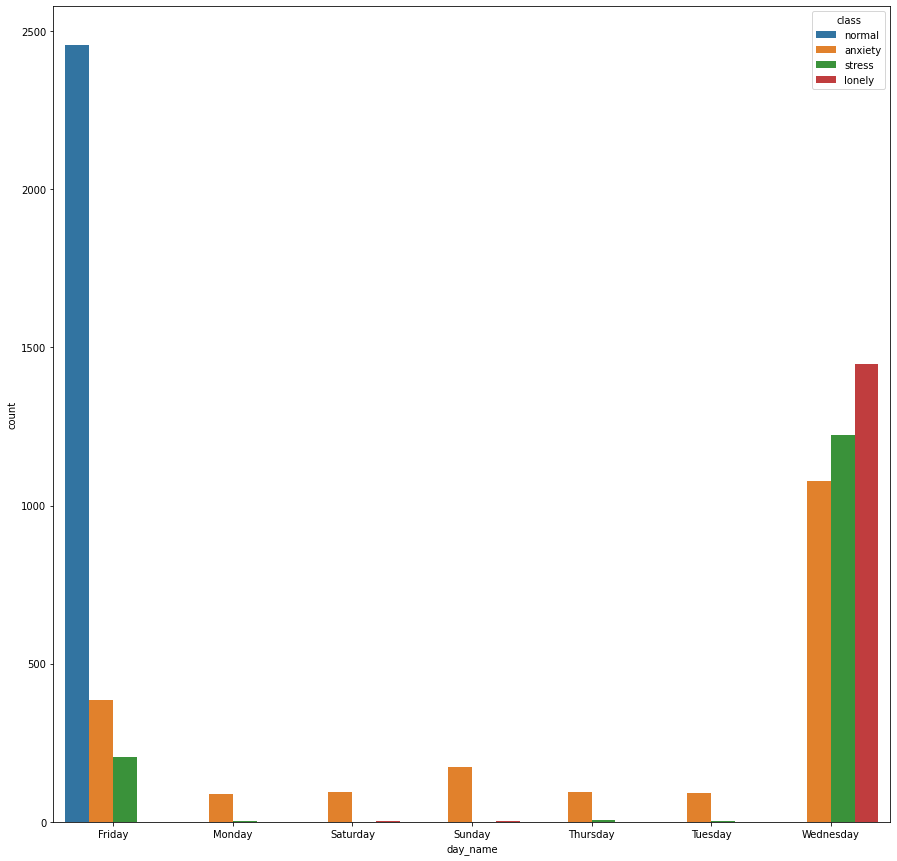

In [18]:
week=data[['day_name','class']].groupby(['day_name'])
new=week['class'].value_counts()
cc=new.reset_index(name='count')
plt.figure(figsize=(15,15))
sns.barplot(x=cc['day_name'], y=cc['count'],hue=cc['class'])

plt.savefig("distribution of classes over day of the week .png", dpi=100)

## Data preprocessing

In [19]:
data = pd.read_csv('final_data_en.csv', index_col='id')
data = data.drop(data.columns[0], axis=1)

In [20]:
data=data[['text','class']]
data

,text,class
id,,
1039,RT @maideeeni: I want to say a very big thank ...,anxiety
1682,@AisYalcaE @clyrhck Done! I just need 320! Tha...,lonely
5275,@SAD_istfied I'm gonna cry /pos,stress
6069,RT @JoshOfficial___: I need a consistent fuck ...,anxiety
6087,RT @mikegolicjr: glad we're finally talking ab...,normal
...,...,...
7813,Im nervous ash to fly though,anxiety
1305,64E7B6DA :Battle ID\nI need backup!\nLvl 120 G...,lonely
5192,SNOW MUCH FUN writing about our snow days in @...,anxiety


In [21]:
cachedStopWords = list(esw)
lemmatizer=WordNetLemmatizer()
#ps = PorterStemmer()

def lemmatize_article(sentence):
    sentence = word_tokenize(sentence)
    res = ''
    for word, tag in pos_tag(sentence):
        wntag = tag[0].lower()
        wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None
        word = lemmatizer.lemmatize(word, wntag) if wntag else word
        res += word + ' '
    return res


def remove_stop_words(sentence):
    return ' '.join([word for word in sentence.split() if word not in cachedStopWords])
    
def remove_short(sentence):
    return ' '.join([word for word in sentence.split() if len(word) >= 3])
    
def remove_digits(sentence):
    return ' '.join([i for i in sentence.split() if not i.isdigit()])
    
def preprocess(all_texts):
    all_texts = list(map(lambda x: x.lower(), all_texts))
    all_texts = list(map(lambda x: x.translate(str.maketrans('', '', string.punctuation)), all_texts))
    all_texts = list(map(lambda x: lemmatize_article(x), all_texts))
    all_texts = list(map(lambda x: x.strip(), all_texts))
    all_texts = list(map(lambda x: remove_stop_words(x), all_texts))
    all_texts = list(map(lambda x: remove_short(x), all_texts))
    all_texts = list(map(lambda x: remove_digits(x), all_texts))
    return all_texts

In [22]:
data['text'] = data['text'].str.replace(r'\s*@\w+', '', regex = True)
data['text'] = data['text'].str.replace(r'\s*\B@\w+', '', regex = True)
data['text'] = data['text'].str.replace(r'\s*@\S+', '', regex = True)
data['text'] = data['text'].str.replace(r'\s*@\S+\b', '', regex = True)
data['text'] = data['text'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
data


,text,class
id,,
1039,RT: I want to say a very big thank you to ever...,anxiety
1682,Done! I just need 320! Thanks for the chance!,lonely
5275,I'm gonna cry /pos,stress
6069,RT: I need a consistent fuck buddy,anxiety
6087,RT: glad we're finally talking about Deshaun a...,normal
...,...,...
7813,Im nervous ash to fly though,anxiety
1305,64E7B6DA :Battle ID\nI need backup!\nLvl 120 G...,lonely
5192,SNOW MUCH FUN writing about our snow days in t...,anxiety


In [23]:
data['text'] = preprocess(data['text'])
data

,text,class
id,,
1039,want say big thank single reach just make sure...,anxiety
1682,just need thanks chance,lonely
5275,gon,stress
6069,need consistent fuck buddy,anxiety
6087,glad finally talk deshaun denver loud,normal
...,...,...
7813,nervous ash fly,anxiety
1305,64e7b6da battle need backup lvl grimnir,lonely
5192,snow fun write snow day today blast writing sh...,anxiety


In [24]:
data = pd.DataFrame(data)
data.head()

,text,class
id,,
1039,want say big thank single reach just make sure...,anxiety
1682,just need thanks chance,lonely
5275,gon,stress
6069,need consistent fuck buddy,anxiety
6087,glad finally talk deshaun denver loud,normal


### Visualize the most repeated words in each class

<Figure size 2880x4320 with 0 Axes>

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'lonely')

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'normal')

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'anxiety')

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'stress')

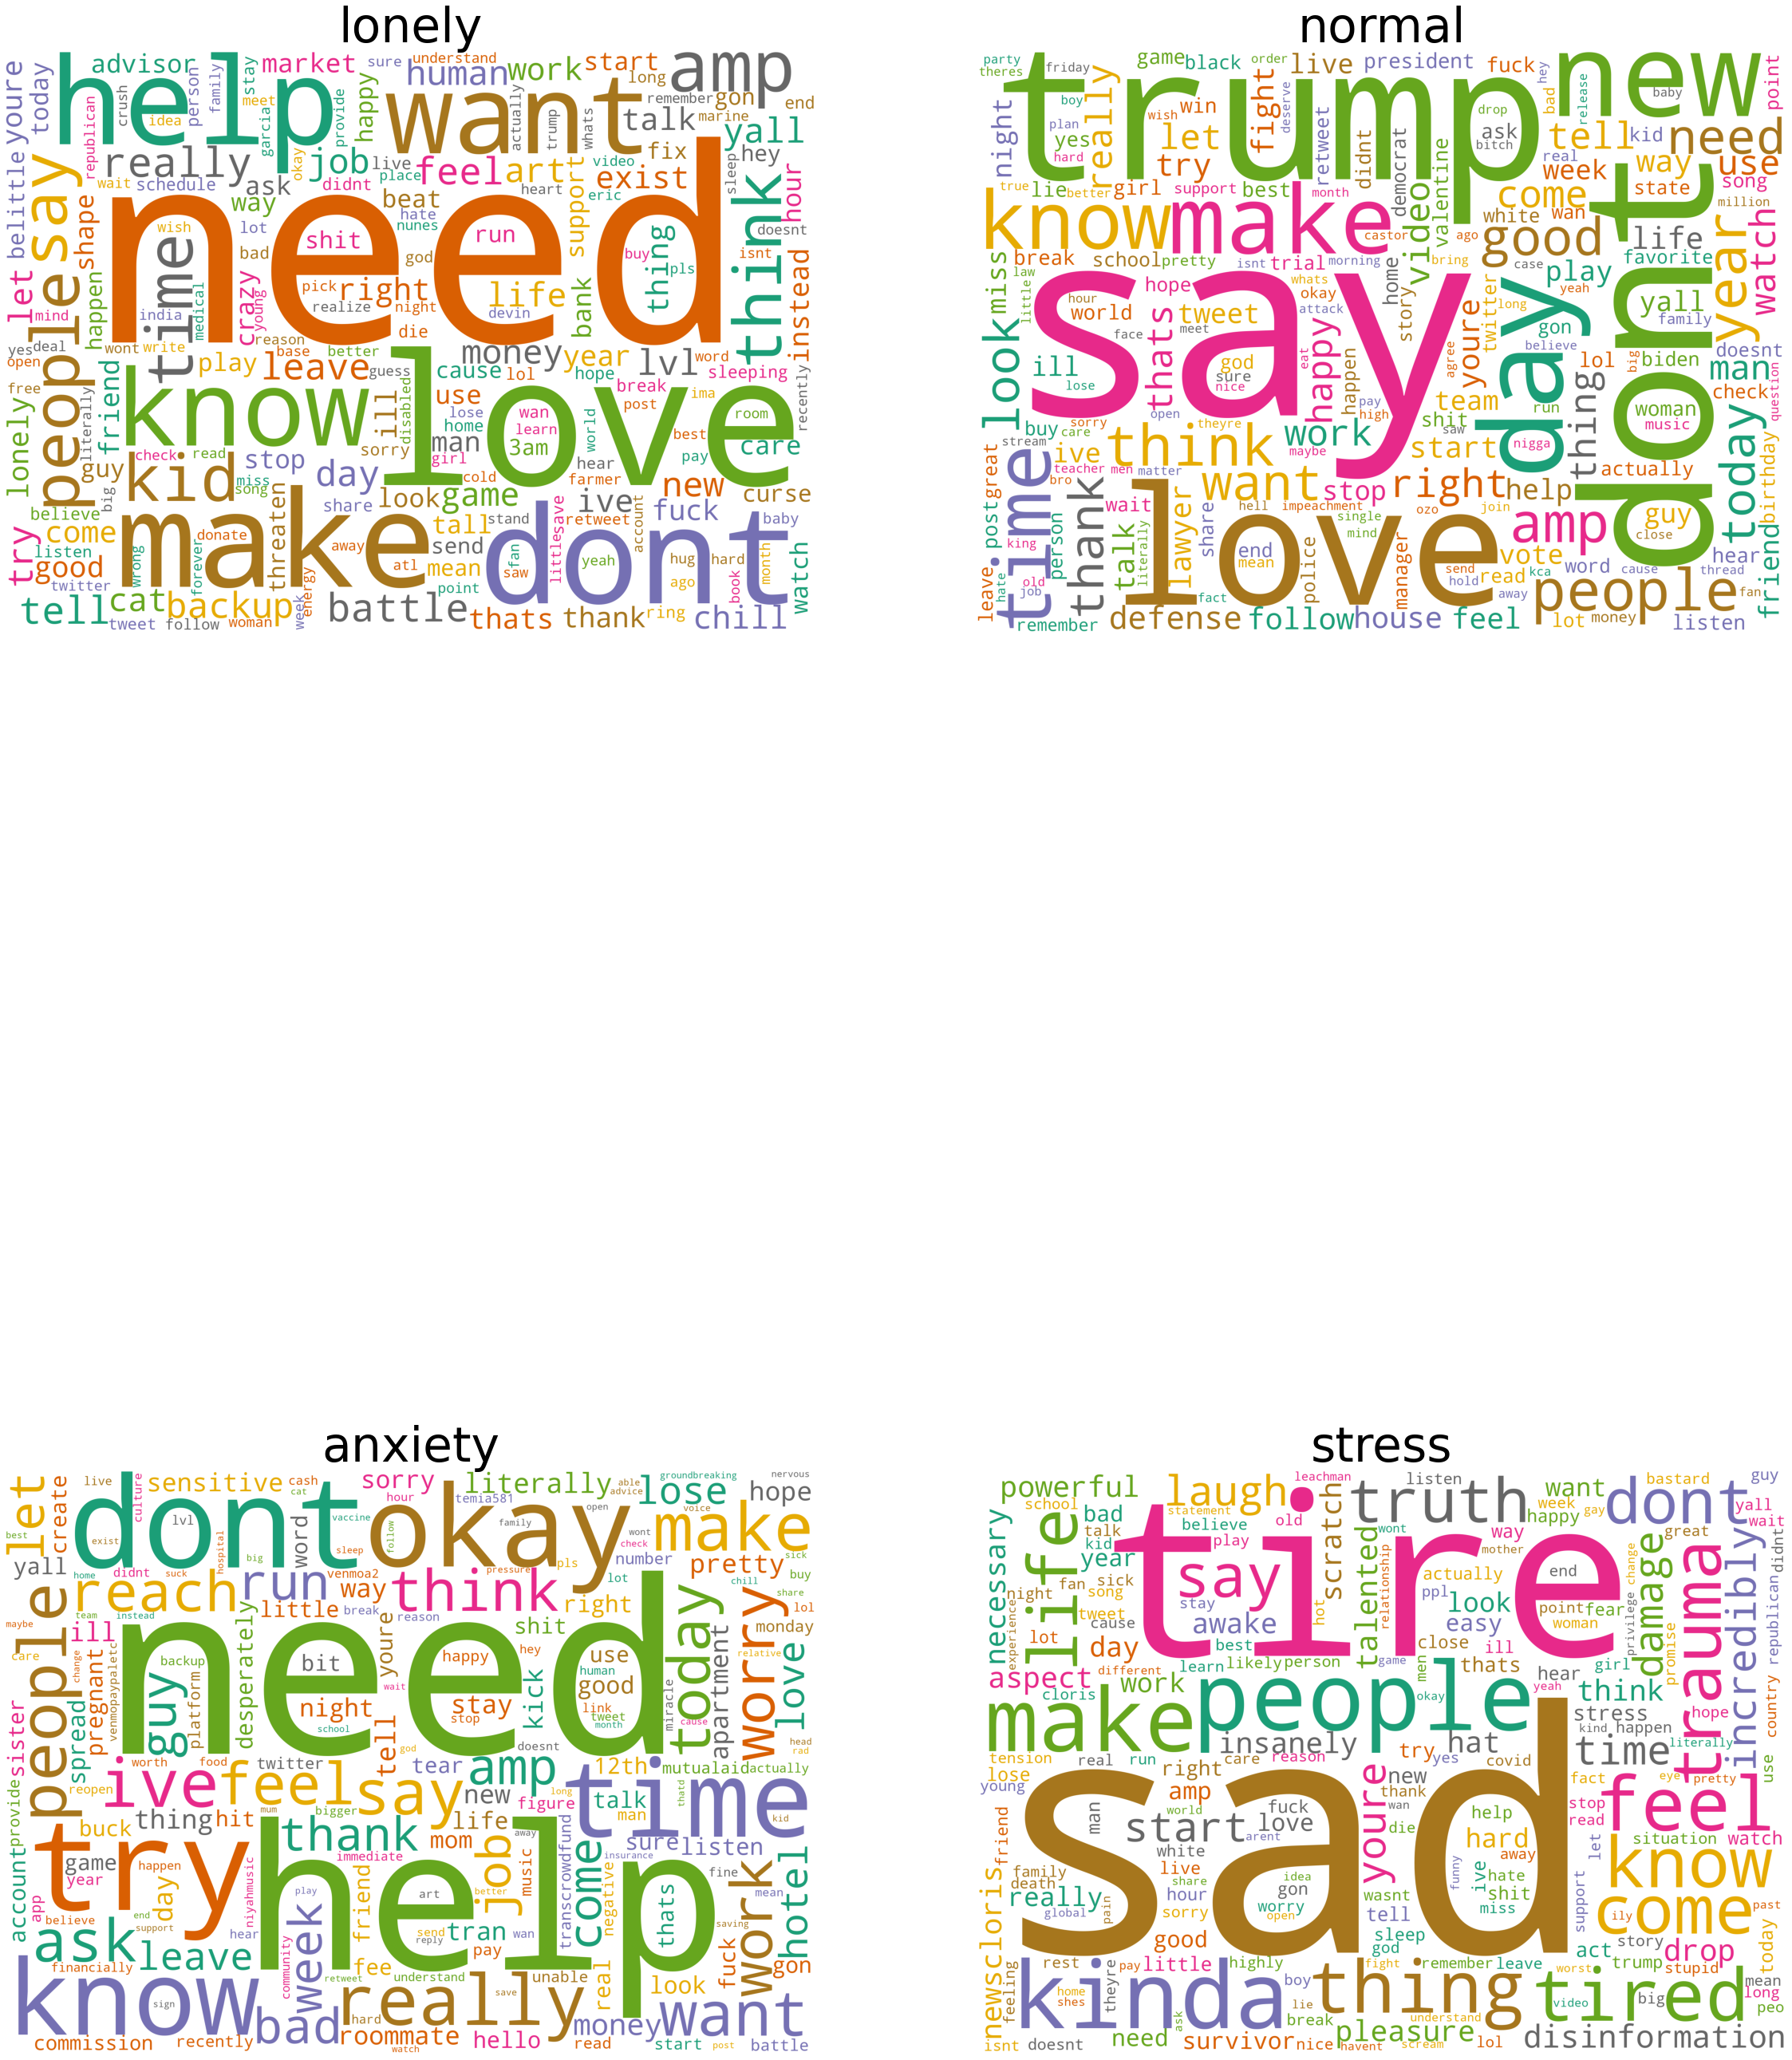

In [25]:
plt.figure(figsize=(40,60))
subset = data[data['class']=='lonely']
text_cleaned = subset.text.values
cloud1=WordCloud(stopwords=STOPWORDS,background_color='white',colormap="Dark2",collocations=False,width=2500,height=1800).generate(" ".join(text_cleaned))

plt.subplot(2,2,1)
plt.axis('off')
plt.title("lonely",fontsize=60)
plt.imshow(cloud1)


subset = data[data['class']=='normal']
text_cleaned = subset.text.values
cloud2 = WordCloud(stopwords=STOPWORDS,background_color='white',colormap="Dark2",collocations=False,width=2500,height=1800).generate(" ".join(text_cleaned))

plt.subplot(2,2,2)
plt.axis('off')
plt.title("normal",fontsize=60)
plt.imshow(cloud2)

subset = data[data['class']=='anxiety']
text_cleaned = subset.text.values
cloud3 = WordCloud(stopwords=STOPWORDS,background_color='white',colormap="Dark2",collocations=False,width=2500,height=1800).generate(" ".join(text_cleaned))

plt.subplot(2,2,3)
plt.axis('off')
plt.title("anxiety",fontsize=60)
plt.imshow(cloud3)


subset = data[data['class']=='stress']
text_cleaned = subset.text.values
cloud4 = WordCloud(stopwords=STOPWORDS,background_color='white',colormap="Dark2",collocations=False,width=2500,height=1800).generate(" ".join(text_cleaned))

plt.subplot(2,2,4)
plt.axis('off')
plt.title("stress",fontsize=60)
plt.imshow(cloud4)


In [26]:
# drop the rows that contain empty or null in the text column
data = data[(data["text"] != "") & (data["text"] != "null")]
data.shape


(39555, 2)

## Split the features and the label to be prepared to used in the classification problem

In [27]:
X = data['text'].values
Y = data['class'].values


## Make vectorization for the features (text column)

In [28]:
td = TfidfVectorizer(max_features = 4500)
X = td.fit_transform(X).toarray()

## Split the data into trainind and test parts by percentage 70% : 30%

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,
                                                    random_state = 0)

## Start the modeling part

In [30]:
# Multinominal Naive Bayes
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Classification metrics

classification_report = classification_report(y_test, y_pred)

print('\n Accuracy: ', accuracy_score(y_test, y_pred))
print('\nClassification Report')
print('======================================================')
print('\n', classification_report)

MultinomialNB()


 Accuracy:  0.6408527850341282

Classification Report

               precision    recall  f1-score   support

     anxiety       0.60      0.72      0.65      3798
      lonely       0.58      0.48      0.52      2574
      normal       0.59      0.57      0.58      2959
      stress       0.84      0.78      0.81      2536

    accuracy                           0.64     11867
   macro avg       0.65      0.64      0.64     11867
weighted avg       0.64      0.64      0.64     11867



## Start the rest of the models with the default hyperparameters
Models:


1.   LogisticRegression
2.   LinearSVC
3.   RandomForestClassifier
4.   XGBClassifier
5.   MLPClassifier

In [31]:
classifiers = [
    LogisticRegression(solver="sag", random_state=42),
    LinearSVC(random_state=42),
    RandomForestClassifier(random_state=1),
    XGBClassifier(random_state=42)
]
# get names of the objects in list (too lazy for c&p...)
names = [re.match(r"[^\(]+", name.__str__())[0] for name in classifiers]
print(f"Classifiers to test: {names}")

Classifiers to test: ['LogisticRegression', 'LinearSVC', 'RandomForestClassifier', 'XGBClassifier', 'MLPClassifier']


In [32]:
%%time
# test all classifiers and save pred. results on test data
results = {}
for name, clf in zip(names, classifiers):
    print(f"Training classifier: {name}")
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)
    print(f'\n Accuracy for {name}: ', accuracy_score(y_test, prediction))
    report = sklearn.metrics.classification_report(y_test, prediction)
    results[name] = report

Training classifier: LogisticRegression
Training classifier: LinearSVC
Training classifier: RandomForestClassifier
Training classifier: XGBClassifier
Training classifier: MLPClassifier
CPU times: user 21min 38s, sys: 42.8 s, total: 22min 21s
Wall time: 21min 18s


In [33]:
for k, v in results.items():
    print(f"Results for {k}:")
    print(f"{v}\n")

Results for LogisticRegression:
              precision    recall  f1-score   support

     anxiety       0.76      0.71      0.73      3798
      lonely       0.64      0.61      0.63      2574
      normal       0.76      0.88      0.82      2959
      stress       0.95      0.91      0.93      2536

    accuracy                           0.77     11867
   macro avg       0.78      0.78      0.78     11867
weighted avg       0.78      0.77      0.77     11867


Results for LinearSVC:
              precision    recall  f1-score   support

     anxiety       0.75      0.70      0.72      3798
      lonely       0.61      0.65      0.63      2574
      normal       0.81      0.83      0.82      2959
      stress       0.94      0.93      0.94      2536

    accuracy                           0.77     11867
   macro avg       0.78      0.78      0.78     11867
weighted avg       0.77      0.77      0.77     11867


Results for RandomForestClassifier:
              precision    recall  f1

### Hyperparameters tuning for Naive Bayes

Fitting 15 folds for each of 8 candidates, totalling 120 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=MultinomialNB(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.1, 1, 10, 100,
                                   1000]},
             scoring='accuracy', verbose=1)

{'alpha': 1}

0.6380382286153193

Text(0.5, 0, 'alpha')

Text(0, 0.5, 'Mean CV Score')

Text(0.5, 1.0, 'NB Performance Comparison')

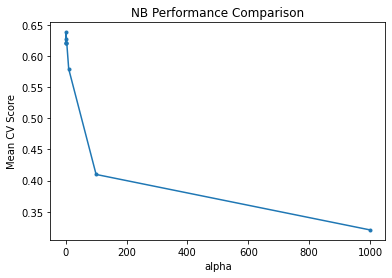

accuracy_score on test dataset :  0.6408527850341282

 Accuracy:  0.6408527850341282

Classification Report

               precision    recall  f1-score   support

     anxiety       0.60      0.72      0.65      3798
      lonely       0.58      0.48      0.52      2574
      normal       0.59      0.57      0.58      2959
      stress       0.84      0.78      0.81      2536

    accuracy                           0.64     11867
   macro avg       0.65      0.64      0.64     11867
weighted avg       0.64      0.64      0.64     11867



In [34]:
model = MultinomialNB()


cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)


params_NB = {'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]}

gs_NB = GridSearchCV(estimator=model, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

# Data_transformed = PowerTransformer().fit_transform(X_test)

gs_NB.fit(X_train, y_train)
gs_NB.best_params_
gs_NB.best_score_

results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']


plt.plot(results_NB['alpha'], results_NB['test_score'], marker = '.')    
plt.xlabel('alpha')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

# predict the target on the test dataset
predict_test = gs_NB.predict(X_test)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)


report = sklearn.metrics.classification_report(y_test, predict_test)

print('\n Accuracy: ', accuracy_score(y_test, predict_test))
print('\nClassification Report')
print('======================================================')
print('\n', report)

### hyperparameters for logistic regression

In [35]:
%%time
# feature creation and modelling in a single function using pipeline
pipe = Pipeline([("lr", LogisticRegression())])

# define parameter space to test
params = {
    # parameters for the classifier
    # lr__solver points to lr->solver for the classifier
    'lr__solver' : ['newton-cg', 'lbfgs', 'liblinear'],
     # lr__penalty points to lr->penalty of the regularization to prevent the overfitting in the model  
    'lr__penalty': ['l2'],
      # lr__C points to lr->C values 
    'lr__C' : [1000, 100, 10, 1.0, 0.1, 0.01]
}
# n_jobs = -1 to work on all virtual processors
# cv = 3 means 3 k folds and 3 times for cross validation by changing each time the validation part
pipe_lr_clf = GridSearchCV(pipe, params, n_jobs=-1, scoring="accuracy",verbose=1, cv = 3)
# make fitting for the model to try all combinations created for the hyperparameters
pipe_lr_clf.fit(X_train, y_train)
# pickle.dump(pipe_lr_clf, open("./pipe_lr_clf.pck", "wb"))

Fitting 3 folds for each of 18 candidates, totalling 54 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


CPU times: user 19.9 s, sys: 4.53 s, total: 24.5 s
Wall time: 42min 22s


GridSearchCV(cv=3, estimator=Pipeline(steps=[('lr', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'lr__C': [1000, 100, 10, 1.0, 0.1, 0.01],
                         'lr__penalty': ['l2'],
                         'lr__solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy', verbose=1)

In [36]:
# display the best combination of the hyperparameters and the best score on the training dataset using cross-validation method
best_params = pipe_lr_clf.best_params_
print(best_params)
print('best score {}'.format(pipe_lr_clf.best_score_))

{'lr__C': 10, 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}
best score 0.7634353900616554


In [37]:
# run the pipe with optimized parameters
pipe.set_params(**best_params).fit(X_train, y_train)

Pipeline(steps=[('lr', LogisticRegression(C=10, solver='liblinear'))])

In [38]:
prediction = pipe.predict(X_test)
report = sklearn.metrics.classification_report(y_test, prediction)


print('\n Accuracy: ', accuracy_score(y_test, prediction))
print('\nClassification Report')
print('======================================================')
print('\n', report)



 Accuracy:  0.6408527850341282

Classification Report

               precision    recall  f1-score   support

     anxiety       0.75      0.70      0.72      3798
      lonely       0.61      0.66      0.63      2574
      normal       0.82      0.84      0.83      2959
      stress       0.95      0.93      0.94      2536

    accuracy                           0.77     11867
   macro avg       0.78      0.78      0.78     11867
weighted avg       0.78      0.77      0.77     11867



### hyperparameters for LinearSVC

In [39]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000]} 
  
grid = GridSearchCV(LinearSVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .............................C=0.1;, score=0.772 total time=   1.2s
[CV 2/5] END .............................C=0.1;, score=0.764 total time=   0.9s
[CV 3/5] END .............................C=0.1;, score=0.760 total time=   0.9s
[CV 4/5] END .............................C=0.1;, score=0.766 total time=   0.9s
[CV 5/5] END .............................C=0.1;, score=0.761 total time=   0.9s
[CV 1/5] END ...............................C=1;, score=0.772 total time=   1.1s
[CV 2/5] END ...............................C=1;, score=0.763 total time=   1.1s
[CV 3/5] END ...............................C=1;, score=0.763 total time=   1.1s
[CV 4/5] END ...............................C=1;, score=0.763 total time=   1.1s
[CV 5/5] END ...............................C=1;, score=0.757 total time=   1.1s
[CV 1/5] END ..............................C=10;, score=0.745 total time=   2.7s
[CV 2/5] END ..............................C=10;,

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5] END .............................C=100;, score=0.719 total time=   4.7s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END .............................C=100;, score=0.719 total time=   4.7s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5] END .............................C=100;, score=0.717 total time=   4.5s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5] END .............................C=100;, score=0.718 total time=   4.6s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END .............................C=100;, score=0.710 total time=   4.7s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 1/5] END ............................C=1000;, score=0.722 total time=   5.3s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 2/5] END ............................C=1000;, score=0.704 total time=   5.3s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 3/5] END ............................C=1000;, score=0.710 total time=   5.1s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 4/5] END ............................C=1000;, score=0.694 total time=   5.2s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[CV 5/5] END ............................C=1000;, score=0.677 total time=   5.4s


GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.1, 1, 10, 100, 1000]},
             verbose=3)

In [40]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 0.1}
LinearSVC(C=0.1)


In [41]:

grid_predictions = grid.predict(X_test)
  
report = sklearn.metrics.classification_report(y_test, grid_predictions)


print('\n Accuracy: ', accuracy_score(y_test, grid_predictions))
print('\nClassification Report')
print('======================================================')
print('\n', report)


 Accuracy:  0.7735737760175276

Classification Report

               precision    recall  f1-score   support

     anxiety       0.76      0.71      0.74      3798
      lonely       0.64      0.61      0.62      2574
      normal       0.75      0.88      0.81      2959
      stress       0.95      0.91      0.93      2536

    accuracy                           0.77     11867
   macro avg       0.78      0.78      0.78     11867
weighted avg       0.77      0.77      0.77     11867



### hyperparameters for RandomForestClassifier

In [47]:
# feature creation and modelling in a single function using pipeline
pipe = Pipeline([("rf", RandomForestClassifier())])

n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node

random_params = {'rf__n_estimators': n_estimators,
'rf__max_features': max_features,
'rf__max_depth': max_depth,
'rf__min_samples_split': min_samples_split,
'rf__min_samples_leaf': min_samples_leaf}

# n_jobs = -1 to work on all virtual processors
# cv = 3 means 3 k folds and 3 times for cross validation by changing each time the validation part
pipe_rf_clf = RandomizedSearchCV(pipe, random_params, n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = -1, scoring="accuracy")
# make fitting for the model to try all combinations created for the hyperparameters
pipe_rf_clf.fit(X_train, y_train)



Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


KeyboardInterrupt: ignored

In [ ]:
# display the best combination of the hyperparameters and the best score on the training dataset using cross-validation method
best_params = pipe_rf_clf.best_params_
print(best_params)
print('best score {}'.format(pipe_rf_clf.best_score_))

In [ ]:
# run the pipe with optimized parameters
pipe.set_params(**best_params).fit(X_train, y_train)

In [ ]:
prediction = pipe.predict(X_test)
report = sklearn.metrics.classification_report(y_test, prediction)


print('\n Accuracy: ', accuracy_score(y_test, predict_test))
print('\nClassification Report')
print('======================================================')
print('\n', report)

### hyperparameters for XGBClassifier

In [ ]:
%%time
# feature creation with word based analyzer and modelling in a single function using pipeline
pipe_xgb = Pipeline([("xgb", XGBClassifier())])

# define parameter space to test
params_xgb = {
    # parameters for the classifier
    # xgb__n_estimators points to xgb->number of estimators
    'xgb__n_estimators': [80, 100, 200, 300, 400],  
     # xgb__max_depth points to xgb->max_depth
    'xgb__max_depth':[50, 100, 200, 300]  
}

# use bayes search to find the best combination of the hyperparameters with cross-validation = 2 which means 2 k folds and 2 
# times to change the validation set each time
pipe_xgb_clf = BayesSearchCV(pipe_xgb, params_xgb, n_jobs=-1, cv=2, scoring="accuracy", verbose = 1,
     # number of trials 
        n_iter=60)
# make fitting with each combination made to find the best one that gives the best results
pipe_xgb_clf.fit(X_train, y_train)

In [ ]:
# display the best combination of the hyperparameters and the best score on the training dataset using cross-validation method
best_params = pipe_xgb_clf.best_params_
print(best_params)
print('best score {}'.format(pipe_xgb_clf.best_score_))

In [ ]:
# run pipe with optimized parameters
pipe_xgb.set_params(**best_params).fit(X_train, y_train)

prediction = pipe_xgb.predict(X_test)
report = sklearn.metrics.classification_report(y_test, prediction)


print('\n Accuracy: ', accuracy_score(y_test, predict_test))
print('\nClassification Report')
print('======================================================')
print('\n', report)


## RNN model

In [ ]:
X = data.text
Y =data['class']
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [ ]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [ ]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(300)(layer)
    layer = Dense(500,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(4,name='out_layer')(layer)
    layer = Activation('softmax')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [ ]:
model = RNN()
model.summary()
model.compile(loss='sparse_categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [ ]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

In [ ]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [ ]:
accr = model.evaluate(test_sequences_matrix,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

# References:
https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/